In [2]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.tsa as tsa
from statsmodels.tsa.arima.model import ARIMA

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
df = pd.read_csv("../data/temperature_readings_from_a_ceramic_furnace.csv", header=None)

In [5]:
df.head()

,0
0,1578.71
1,1578.79
2,1579.38
3,1579.36
4,1579.83


In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
df.dtypes

0    float64
dtype: object

In [8]:
df.rename(columns={0: 'temperature'}, inplace=True)

In [9]:
df

,temperature
0,1578.71
1,1578.79
2,1579.38
3,1579.36
4,1579.83
...,...
75,1579.40
76,1578.90
77,1578.50
78,1579.30


<AxesSubplot:xlabel='Time', ylabel='Temperature'>

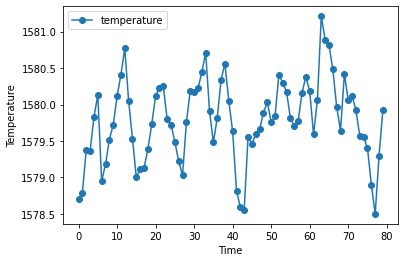

In [10]:
df.plot(marker='o', xlabel='Time', ylabel='Temperature')

## Time Series Analysis

/Users/tadatoshi/.pyenv/versions/3.10.4/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


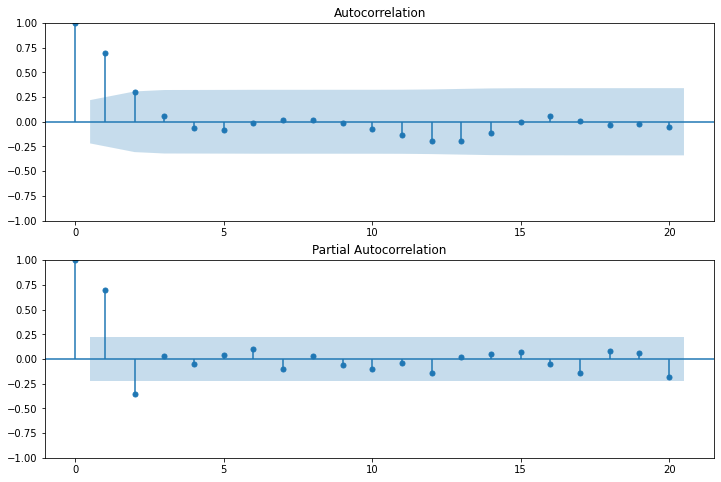

In [11]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
_ = sm.graphics.tsa.plot_acf(df, lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
_ = sm.graphics.tsa.plot_pacf(df, lags=20, ax=ax2)

In [12]:
acf, acf_confint, acf_qstat, acf_pvalues = tsa.stattools.acf(df, nlags=20, qstat=True, alpha=0.5)

In [13]:
acf

array([ 1.00000000e+00,  6.93487925e-01,  3.05606286e-01,  5.81583754e-02,
       -6.41291075e-02, -8.19154190e-02, -9.91469918e-03,  2.16463974e-02,
        2.07121567e-02, -7.60448364e-03, -7.53367300e-02, -1.36783565e-01,
       -1.90096234e-01, -1.89840864e-01, -1.15706522e-01, -8.15764343e-04,
        5.39126821e-02,  1.05724542e-02, -3.24777154e-02, -2.37372110e-02,
       -5.27815431e-02])

In [14]:
acf_confint

array([[ 1.00000000e+00,  1.00000000e+00],
       [ 6.18077679e-01,  7.68898172e-01],
       [ 1.99982101e-01,  4.11230472e-01],
       [-5.23798102e-02,  1.68696561e-01],
       [-1.74841166e-01,  4.65829509e-02],
       [-1.92838516e-01,  2.90076782e-02],
       [-1.21181274e-01,  1.01351875e-01],
       [-8.96252012e-02,  1.32917996e-01],
       [-9.05833861e-02,  1.32007699e-01],
       [-1.18921944e-01,  1.03712977e-01],
       [-1.86657144e-01,  3.59836844e-02],
       [-2.48393537e-01, -2.51735929e-02],
       [-3.02655461e-01, -7.75370079e-02],
       [-3.04211208e-01, -7.54705201e-02],
       [-2.31854997e-01,  4.41952977e-04],
       [-1.17617885e-01,  1.15986357e-01],
       [-6.28894712e-02,  1.70714835e-01],
       [-1.06371125e-01,  1.27516033e-01],
       [-1.49426730e-01,  8.44712991e-02],
       [-1.40737505e-01,  9.32630825e-02],
       [-1.69809220e-01,  6.42461336e-02]])

In [15]:
acf_qstat

array([39.93507972, 47.78985571, 48.07801833, 48.43299568, 49.0199089 ,
       49.02862317, 49.07072997, 49.10981604, 49.11515903, 49.64704598,
       51.4258274 , 54.91194437, 58.44059321, 59.77127919, 59.77134635,
       60.06927052, 60.0809095 , 60.19251436, 60.25310888, 60.55769967])

In [16]:
acf_pvalues

array([2.62545398e-10, 4.19338452e-11, 2.04960946e-10, 7.66643376e-10,
       2.19855572e-09, 7.35824244e-09, 2.19769940e-08, 6.05693567e-08,
       1.57931276e-07, 3.09906268e-07, 3.46332804e-07, 1.87690298e-07,
       9.96660006e-08, 1.28665548e-07, 2.76089589e-07, 5.09494733e-07,
       1.01907767e-06, 1.90456028e-06, 3.52878727e-06, 5.83612650e-06])

In [17]:
pacf, pacf_confint = tsa.stattools.pacf(df, nlags=20, alpha=0.5)

In [18]:
pacf

array([ 1.        ,  0.70226625, -0.35463241,  0.02547835, -0.0557172 ,
        0.03644195,  0.09868683, -0.09745465,  0.03193843, -0.0586984 ,
       -0.10040592, -0.04081482, -0.14581954,  0.02389632,  0.04628738,
        0.07400796, -0.055144  , -0.14061411,  0.0801913 ,  0.0617709 ,
       -0.18368056])

In [19]:
pacf_confint

array([[ 1.        ,  1.        ],
       [ 0.62685601,  0.7776765 ],
       [-0.43004266, -0.27922216],
       [-0.0499319 ,  0.1008886 ],
       [-0.13112744,  0.01969305],
       [-0.0389683 ,  0.11185219],
       [ 0.02327658,  0.17409707],
       [-0.1728649 , -0.0220444 ],
       [-0.04347182,  0.10734867],
       [-0.13410864,  0.01671185],
       [-0.17581617, -0.02499568],
       [-0.11622506,  0.03459543],
       [-0.22122978, -0.07040929],
       [-0.05151392,  0.09930657],
       [-0.02912287,  0.12169763],
       [-0.00140229,  0.1494182 ],
       [-0.13055424,  0.02026625],
       [-0.21602436, -0.06520387],
       [ 0.00478105,  0.15560154],
       [-0.01363935,  0.13718115],
       [-0.25909081, -0.10827031]])

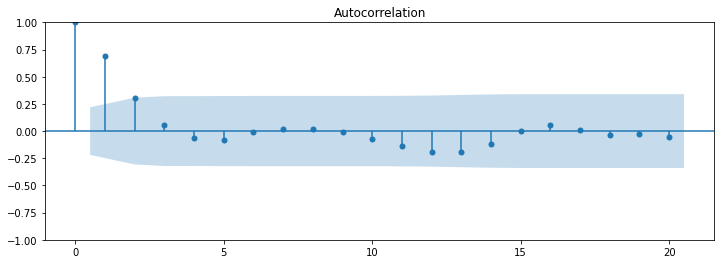

In [20]:
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot()
_ = sm.graphics.tsa.plot_acf(df, lags=20, ax=ax).savefig("../plots/ceramic_furnace_acf.png")

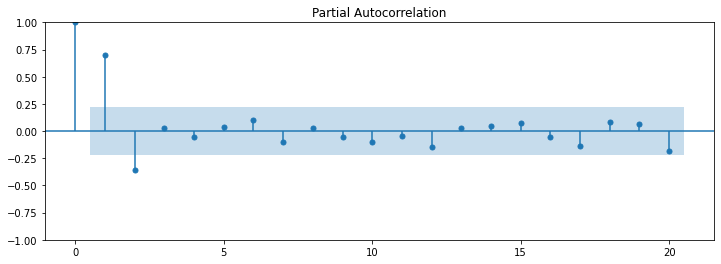

In [21]:
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot()
_ = sm.graphics.tsa.plot_pacf(df, lags=20, ax=ax).savefig("../plots/ceramic_furnace_pacf.png")

### Fit ARMA model and evaluate with residual

In [22]:
ariima_model = ARIMA(df, order=(2, 0, 0))

In [23]:
arima_result = ariima_model.fit()

In [24]:
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            temperature   No. Observations:                   80
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 -34.800
Date:                Tue, 28 Jun 2022   AIC                             77.600
Time:                        16:45:31   BIC                             87.128
Sample:                             0   HQIC                            81.420
                                 - 80                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1579.7858      0.103   1.54e+04      0.000    1579.585    1579.987
ar.L1          0.9698      0.103      9.414      0.000       0.768       1.172
ar.L2         -0.3626      0.114     -3.192      0.001      -0.585      -0.140
sigma2         0.1380      0.019      7.246      0.000       0.101       0.175
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 1.50
Prob(Q):                              0.88   Prob(JB):                         0.47
Heteroskedasticity (H):               1.17   Skew:                            -0.09
Prob(H) (two-sided):                  0.68   Kurtosis:                         3.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### The values are different from the values from the book. The book says

| Coefficient | Estimate | Standard error |
| ---- | ---- | ---- | ---- | 
| Phi1     | 0.9824   | 0.1062         |
| Phi2     | -0.3722  | 0.1066         |
| Constant | 615.836  | 0.042          |
| Mean     | 1579.79  | 0.11           |

"const" from statsmodels ARIMA has a similar value as "Mean" from the book. In fact, the value seems to be mean from the original sample data. 

In [25]:
arima_result.pvalues

const     0.000000e+00
ar.L1     4.795509e-21
ar.L2     1.411313e-03
sigma2    4.291954e-13
dtype: float64

In [26]:
arima_result.tvalues

const     15410.322508
ar.L1         9.413573
ar.L2        -3.192327
sigma2        7.246020
dtype: float64

In [27]:
prediction = arima_result.predict()
prediction

0     1579.785837
1     1579.020127
2     1579.210148
3     1579.753314
4     1579.520009
         ...     
75    1579.645078
76    1579.493539
77    1579.066658
78    1578.860026
79    1579.780874
Name: predicted_mean, Length: 80, dtype: float64

In [28]:
type(prediction)

pandas.core.series.Series

In [29]:
prediction_df = prediction.to_frame()

In [30]:
prediction_df.rename(columns={'predicted_mean':'temperature'}, inplace=True)

In [31]:
prediction_df

,temperature
0,1579.785837
1,1579.020127
2,1579.210148
3,1579.753314
4,1579.520009
...,...
75,1579.645078
76,1579.493539
77,1579.066658
78,1578.860026


<AxesSubplot:xlabel='Time', ylabel='Temperature'>

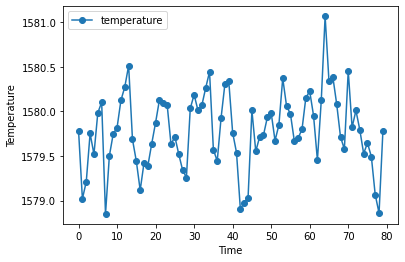

In [32]:
prediction_df.plot(marker='o', xlabel='Time', ylabel='Temperature')

In [33]:
residuals = df - prediction_df

In [34]:
residuals

,temperature
0,-1.075837
1,-0.230127
2,0.169852
3,-0.393314
4,0.309991
...,...
75,-0.245078
76,-0.593539
77,-0.566658
78,0.439974


/Users/tadatoshi/.pyenv/versions/3.10.4/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


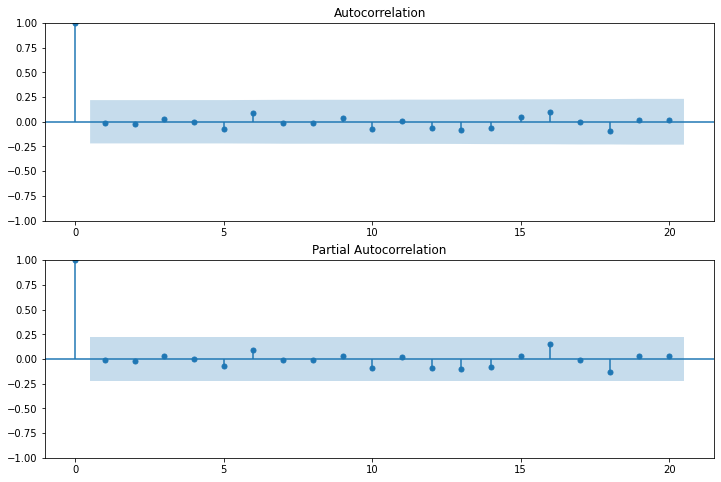

In [35]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
_ = sm.graphics.tsa.plot_acf(residuals, lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
_ = sm.graphics.tsa.plot_pacf(residuals, lags=20, ax=ax2)

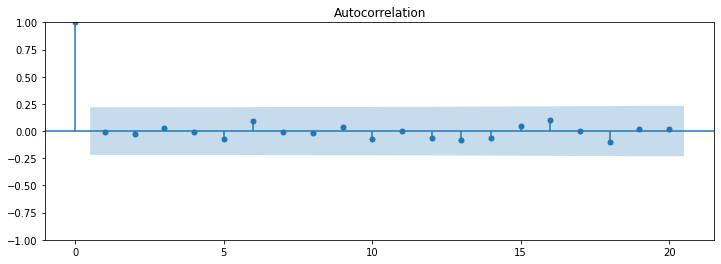

In [36]:
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot()
_ = sm.graphics.tsa.plot_acf(residuals, lags=20, ax=ax).savefig("../plots/ceramic_furnace_residuals_acf.png")

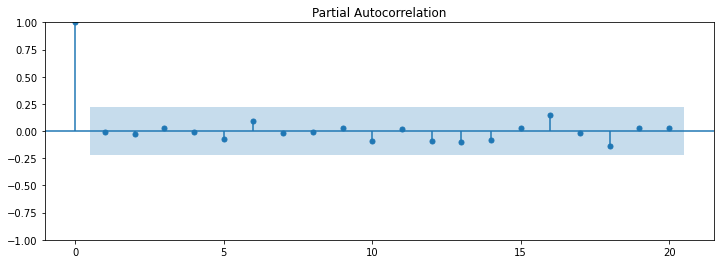

In [37]:
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot()
_ = sm.graphics.tsa.plot_pacf(residuals, lags=20, ax=ax).savefig("../plots/ceramic_furnace_residuals_pacf.png")

### Use variogram calculation from time_series_plot_auto_analysis

In [38]:
from time_series_plot_auto_analysis.variogram.calculation import calculate_variogram

#### Theoretical variogram for AR(2) model fitted to the furnace data
#### in order to compare to Figure 3.12 of the book.

In [39]:
theoretical_variogram_furnace_data = calculate_variogram(prediction_df, lags=15)

<AxesSubplot:xlabel='Lag k', ylabel='Gk'>

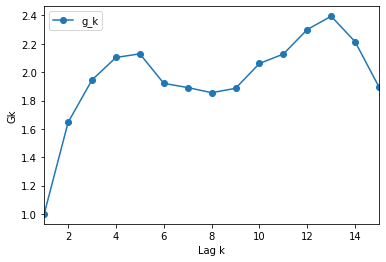

In [40]:
theoretical_variogram_furnace_data.plot(marker='o', xlabel='Lag k', ylabel='Gk', xlim=([1, 15]))

##### Doesn't look like the same at all. Gk values are very different. Shape is very different. 

#### Sample variogram for ceramic furnace data
#### in order to compare to Figure 3.13 of the book.

In [41]:
variogram_furnace_data = calculate_variogram(df, lags=15)

<AxesSubplot:xlabel='Lag k', ylabel='Gk'>

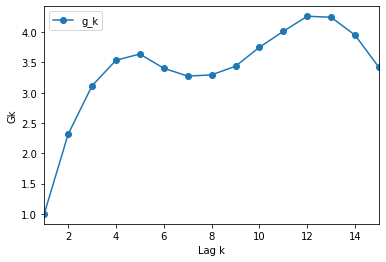

In [42]:
variogram_furnace_data.plot(marker='o', xlabel='Lag k', ylabel='Gk', xlim=([1, 15]))

##### Values are slightly higher than those from Figure 3.13 of the book. 

#### Try saving plot to file

In [43]:
variogram_furnace_data.max()

g_k    4.262513
dtype: float64

In [44]:
variogram_furnace_data.max().values[0]

4.262512791552766

In [45]:
y_ceiling = np.ceil(variogram_furnace_data.max())

In [46]:
y_ceiling

g_k    5.0
dtype: float64

In [47]:
type(y_ceiling)

pandas.core.series.Series

In [48]:
y_ceiling.values

array([5.])

In [49]:
y_ceiling = np.ceil(variogram_furnace_data.max().values[0])

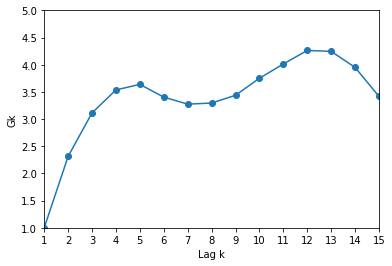

In [50]:
retval = variogram_furnace_data.plot(marker='o', xlabel='Lag k', ylabel='Gk', xlim=([1, 15]), ylim=([1, y_ceiling]), 
                                     xticks=np.arange(1, 16), yticks=np.arange(1, y_ceiling + 1, 0.5), legend=None)

In [51]:
type(retval)

matplotlib.axes._subplots.AxesSubplot

In [52]:
retval.get_figure().savefig("../plots/ceramic_furnace_variogram.png")

#### Use a function based on the trial above

In [53]:
from time_series_plot_auto_analysis.variogram.plotting import plot_and_save

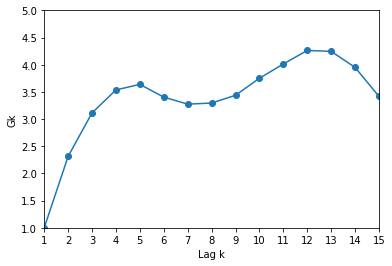

In [54]:
plot_and_save(variogram_furnace_data, "../plots/ceramic_furnace_variogram_2.png", 
              marker_on=True)

#### Try to save plot to file without diplaying in Jupyter notebook

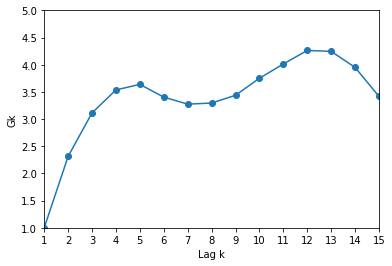

In [55]:
plt.ioff()
variogram_furnace_data.plot(marker='o', xlabel='Lag k', ylabel='Gk', xlim=([1, 15]), ylim=([1, y_ceiling]), 
                            xticks=np.arange(1, 16), yticks=np.arange(1, y_ceiling + 1, 0.5), 
                            legend=None).get_figure().savefig("../plots/ceramic_furnace_variogram_3.png")

In [56]:
fig = variogram_furnace_data.plot(marker='o', xlabel='Lag k', ylabel='Gk', xlim=([1, 15]), ylim=([1, y_ceiling]), 
                                  xticks=np.arange(1, 16), yticks=np.arange(1, y_ceiling + 1, 0.5), 
                                  legend=None).get_figure()
plt.close(fig)
fig.savefig("../plots/ceramic_furnace_variogram_4.png")

##### The second way above with plt.close(fig) worked, i.e. saved plot image to file without displaying it on Jupyter notebook. 
##### Also it didn't prevent the Pandas DataFrame below from displaying plot on Jupyter notebook. 

#### Trying updated plot_and_save function not to display plot on Jupyter notebook

In [57]:
plot_and_save(variogram_furnace_data, "../plots/ceramic_furnace_variogram_5.png", 
              marker_on=True, save_without_displaying_plot=True)

##### Successfully saved plot in file without displaying it on Jupyter notebook. 

#### Trying updated plot_and_save function not to put axis

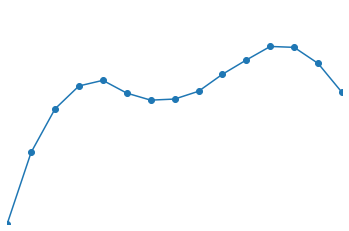

In [58]:
plot_and_save(variogram_furnace_data, "../plots/ceramic_furnace_variogram_6.png", 
              marker_on=True, axis_off=True)

#### Trying out updated plot_and_save function not to put marker

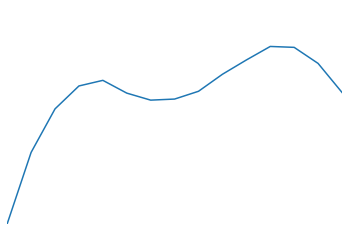

In [59]:
plot_and_save(variogram_furnace_data, "../plots/ceramic_furnace_variogram_7.png", 
              axis_off=True)

### Synthetic data to get theoretical variogram

In [60]:
from statsmodels.tsa.arima_process import arma_generate_sample

In [61]:
arparams = np.array([0.9824, -0.3722])
arparams = np.r_[1, -arparams]
maparams = np.array([1])

In [62]:
generated_arma_sample = arma_generate_sample(arparams, maparams, 80)

In [63]:
generated_arma_sample += 1579.79

In [64]:
generated_arma_sample_df = pd.DataFrame(generated_arma_sample, columns=['temperature'])

<AxesSubplot:xlabel='Time', ylabel='Temperature'>

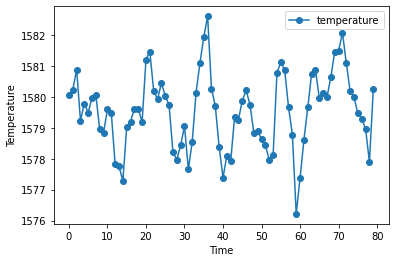

In [65]:
generated_arma_sample_df.plot(marker='o', xlabel='Time', ylabel='Temperature')

In [66]:
theoretical_variogram_generated_arma_sample = calculate_variogram(generated_arma_sample_df, lags=15)

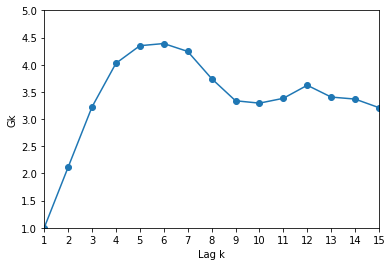

In [67]:
plot_and_save(theoretical_variogram_generated_arma_sample, "../plots/theoretical_variogram_generated_arma_sample.png", 
              marker_on=True)

### Try out newly created generate_synthetic_variogram_plots function

In [77]:
from time_series_plot_auto_analysis.variogram.synthetic import generate_synthetic_variogram_plots

In [83]:
generate_synthetic_variogram_plots(number_of_plots=1, arparams=[0.9824, -0.3722])

#### Generate 100 plots with the same setting as theoretical_variogram_generated_arma_sample above

In [85]:
generate_synthetic_variogram_plots(number_of_plots=100, arparams=[0.9824, -0.3722], number_of_samples=80)